In [329]:
import ssl
import pandas as pd
import numpy as np
import seaborn as sns
import math
from datetime import datetime
from matplotlib import pyplot as plt
import random
import statistics 
import plotly.express as px
import plotly.offline as pyo
import scipy as sc
import warnings
warnings.filterwarnings("ignore")

## Voting Percentage Effects

### Section 1

In [330]:
df1 = pd.read_csv('https://raw.githubusercontent.com/galsalo/statistics_labs/main/votes%20per%20ballot%202021%20-%20votes%20per%20ballot%202021.csv')
df2 = pd.DataFrame(pd.read_csv('https://media24.bechirot.gov.il/files/expc.csv',  encoding = 'iso-8859-8'))
df2 = df2.drop(1214)

parties_names = {'מחל':'ליכוד','פה':'יש עתיד','שס':'שס','כן':'כחול לבן','ג':'יהדות התורה','אמת':'העבודה','ב':'ימינה','ל':'ישראל ביתנו','ודעם':'הרשימה המשותפת','ט':'ציונות דתית','ת':'תקווה חדשה','מרצ': 'מרצ', 'עם':'רעמ'}

max_city = max(df2['בזב'])
propotinal_size = []
for i in range(len(df2)):
  propotinal_size.append((df2.iloc[i, 3] / max_city) * 200)

def two_parties_scatter(df, party1, party2): # Given function from class
    votes_per_city = df.sum(axis=1)
    party_share1 = df[party1] / votes_per_city
    party_share2 = df[party2] / votes_per_city
    plt.scatter(party_share1, party_share2, s = propotinal_size)  
    plt.xlabel(parties_names[party1][::-1], fontsize = 15)
    plt.ylabel(parties_names[party2][::-1], fontsize = 15)
    plt.title('Scatter for two parties ' )
    plt.show()
    plt.rcParams["figure.figsize"] = [8.50, 5.50]

### Section 2

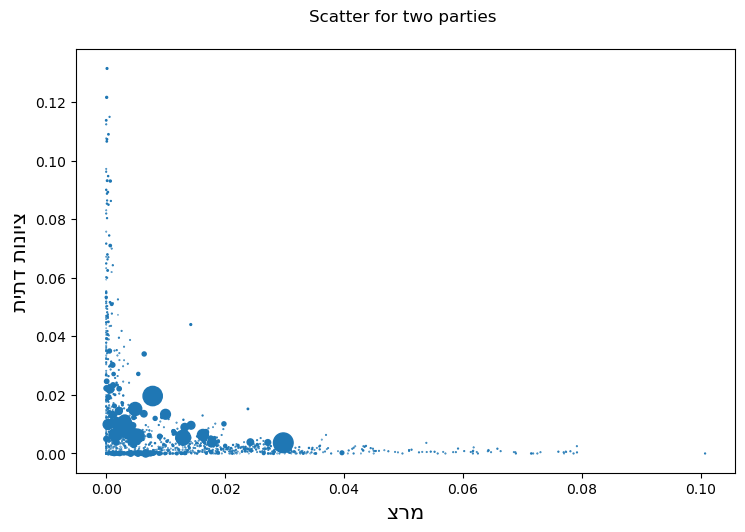

In [332]:
two_parties_scatter(df2, 'מרצ', 'ט')

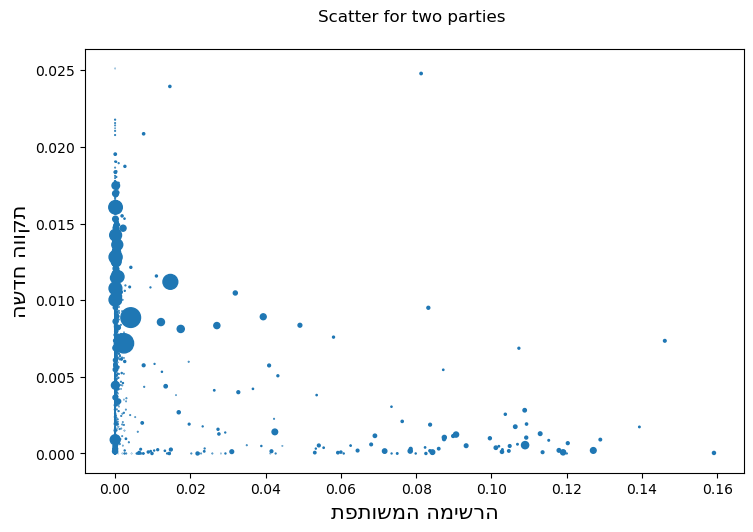

In [333]:
two_parties_scatter(df2, 'ודעם', 'ת')

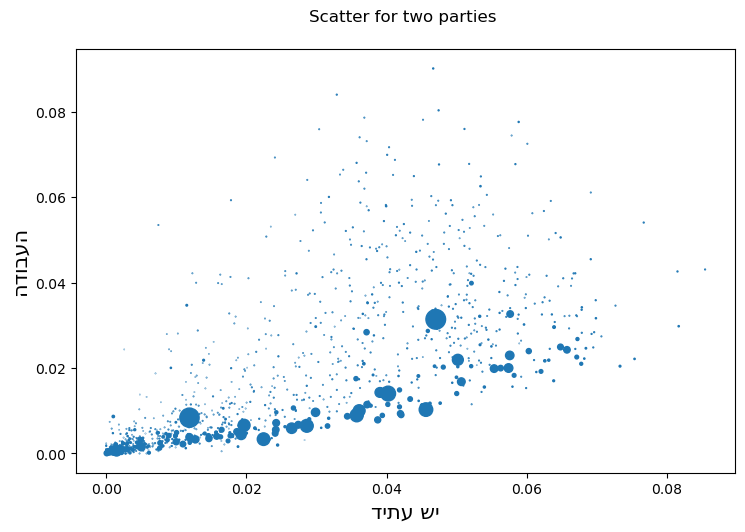

In [334]:
two_parties_scatter(df2, 'פה', 'אמת')

In the graphs above, we can see that the scatter plot for 'הציונות הדתית' and 'מרצ' shows small correlation between cities who voted for one of the two parties. This could also be seen in the second graph, between 'הרשימה המשותפת' and 'תקווה חדשה'. These results make sense because the two parties are quite opposite to one another. Looking at the third graph, we can see a large scatter of votes in the middle which corrospons to the fact 'יש עתיד' and 'העבודה' are similar parties. 





### Section 2

Text(0.5, 1.0, 'Parties Spearman Correlation Heatmap')

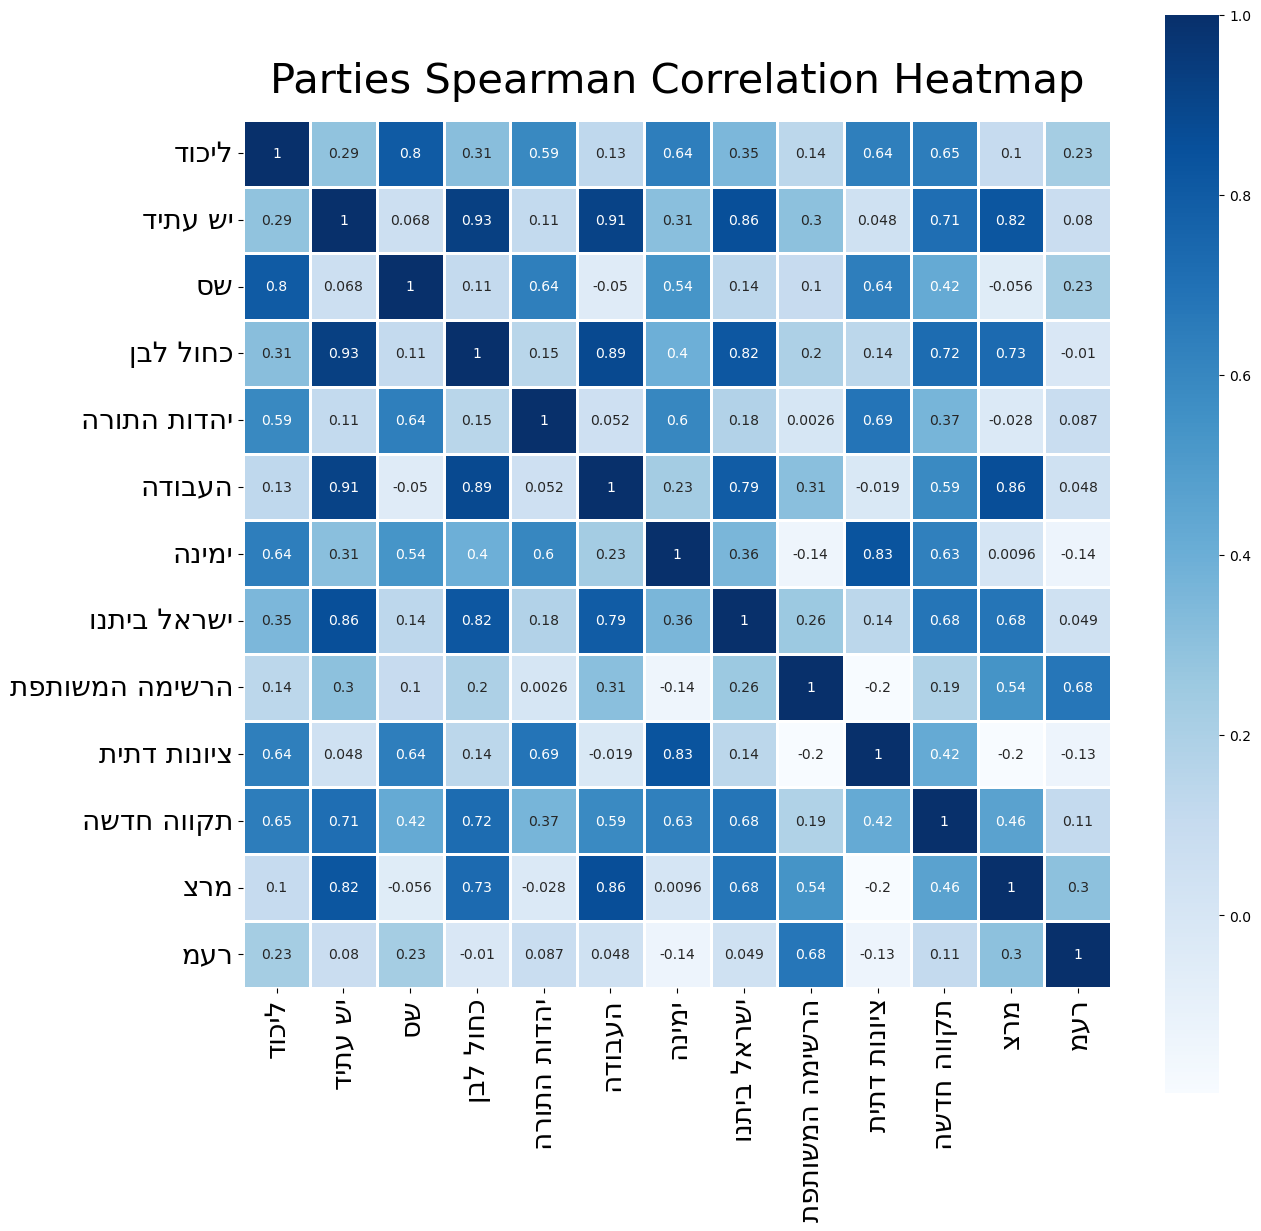

In [336]:
df2.loc["total"] = df2.sum()

big_parties_votes = pd.DataFrame(df2.iloc[-1, 7:46].sort_values()[-13:])

parties = big_parties_votes.index.values[::-1]

parties_freq = {key: [] for key in parties}

i =0
for party in parties_freq:
  for j in range(0, len(df2)-1):
    parties_freq[party].append(df2[party][j]/big_parties_votes['total'][i])
  i += 1

correlation_matrix = np.zeros((13,13))

for i in range(len(parties)):
  for j in range(len(parties)):
    correlation_matrix[i, j] = list(sc.stats.spearmanr(parties_freq[parties[i]], parties_freq[parties[j]]))[0]

parties = [party[::-1] for party in parties_names.values()]

sns.heatmap(correlation_matrix, xticklabels = parties, yticklabels = parties ,square=True, cmap='Blues', linewidths=2,
            annot=True, annot_kws={'size': 10})

plt.rcParams["figure.figsize"] = [14, 14]
plt.rcParams['axes.titlepad'] = 20
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20, rotation = 0)
plt.title('Parties Spearman Correlation Heatmap', fontsize = 30)

Looking at the heatmap of the Spearman Correlation between all parties ordered by their size, we can see that as we expect, the Correlation between most parties and the Arab parties is weak. Beside that, we can the heatmap above is not very informative, with results which show that ordering by party size is not informative to infer about the data.

### Section 3

Text(0.5, 1.0, 'Left to Right Parties Correlation Heatmap')

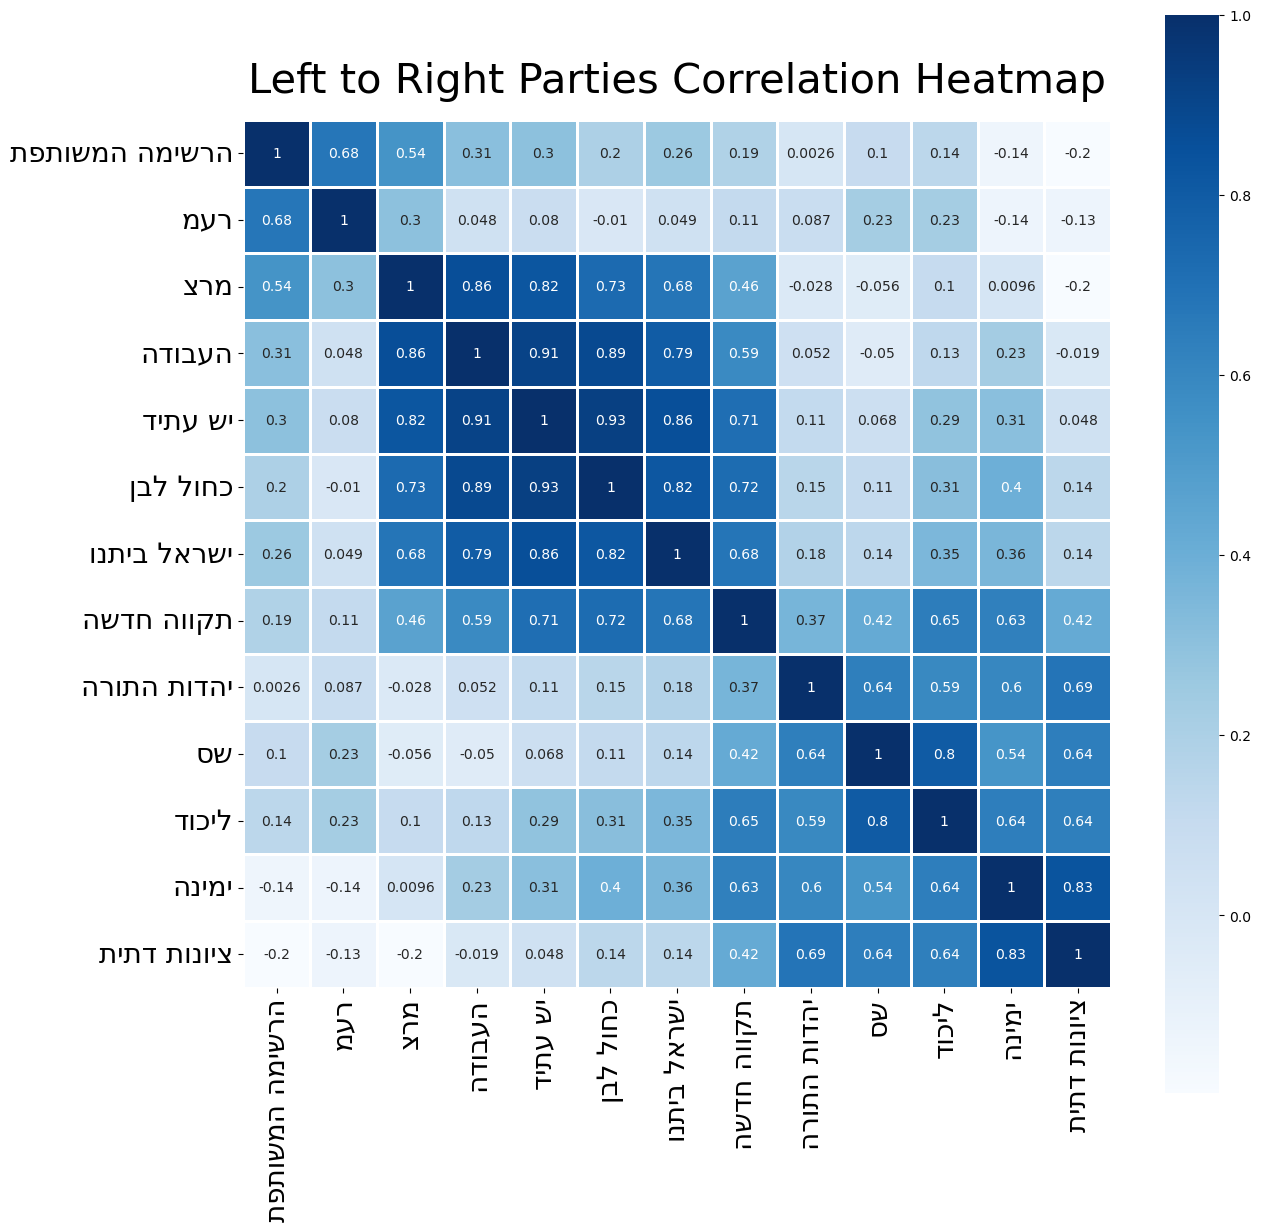

In [337]:
left_to_right = ['ודעם', 'עם', 'מרצ', 'אמת', 'פה', 'כן', 'ל', 'ת','ג', 'שס', 'מחל', 'ב','ט'] 
# I ordered the parties left to right by their agenda about the Palestinian issue

correlation_matrix1 = np.zeros((13,13))

for i in range(len(left_to_right)):
  for j in range(len(left_to_right)):
    correlation_matrix1[i, j] = list(sc.stats.spearmanr(parties_freq[left_to_right[i]], parties_freq[left_to_right[j]]))[0]

left_to_right = [parties_names[party][::-1] for party in left_to_right]

sns.heatmap(correlation_matrix1, xticklabels = left_to_right, yticklabels = left_to_right ,square=True, cmap='Blues', linewidths=2,
            annot=True, annot_kws={'size': 10})

plt.rcParams["figure.figsize"] = [14, 14]
plt.rcParams['axes.titlepad'] = 20
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20, rotation = 0)
plt.title('Left to Right Parties Correlation Heatmap', fontsize = 30)

Looking at the new heatmap above, we can understand much better correlations between parties, when they are ordered by a political scale. Looking at the colors of the heatmap, we can see our proposed arrangment of the parties is good, with low correlation on the edges. 

Comparing both heatmaps, we clearly see that the second one, ordered by political view is much more informative.


### Section 4

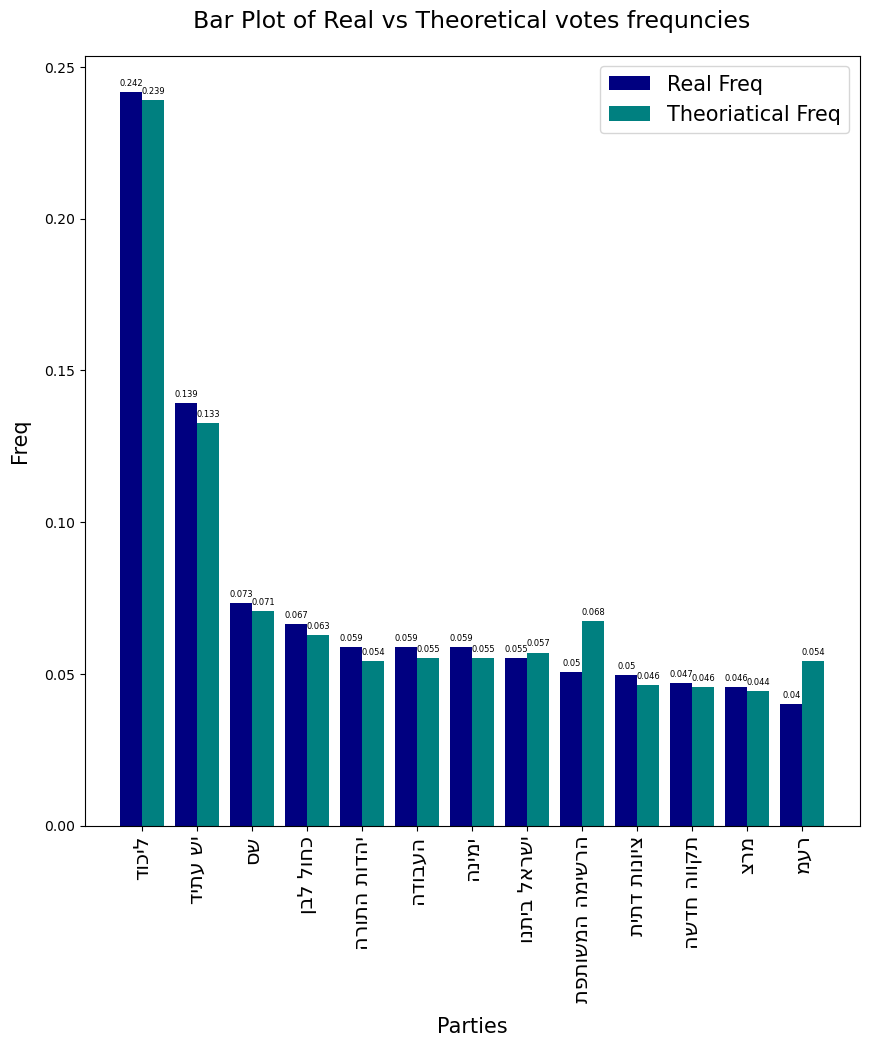

In [339]:
df3 = df2.iloc[:1214, :46]

for party in parties_freq.keys():
  df3[party] = [round(item) for item in np.array(df3[party])/np.array(df3['כשרים']) * np.array(df3['בזב'])]

df3.loc["total"] = df3.sum()

parties_freq1 = {key: [] for key in parties_freq.keys()}
parties_freq2 = {key: [] for key in parties_freq.keys()}

for party in parties_freq.keys():
  parties_freq1[party] = df2[party].iloc[-1] / df2['כשרים'].iloc[-1]

for party in parties_freq.keys():
  parties_freq2[party] = df3[party].iloc[-1] / df3['בזב'].iloc[-1]     
        
width = 0.4
X = np.arange(len(parties_freq1))
ax = plt.subplot(111)
first = ax.bar(X - width/2, parties_freq1.values(), width, color='navy', align='center')
second = ax.bar(X + width/2, parties_freq2.values(), width, color='teal', align='center')
ax.legend(('Real Freq','Theoriatical Freq'), fontsize = 15)
plt.xticks(X, parties, fontsize = 15, rotation = 90)
plt.xlabel('Parties', labelpad = 10, fontsize = 15)
plt.ylabel('Freq', labelpad = 10, fontsize = 15)
plt.title("Bar Plot of Real vs Theoretical votes frequncies", fontsize=17)
plt.rcParams["figure.figsize"] = [10, 10]    
temp1 = [round(item, 3) for item in parties_freq1.values()]
temp2 = [round(item, 3) for item in parties_freq2.values()]
ax.bar_label(first,labels = temp1 ,padding=3, fontsize=6)
ax.bar_label(second,labels = temp2 ,padding=3, fontsize=6)
plt.show()


### Section 5

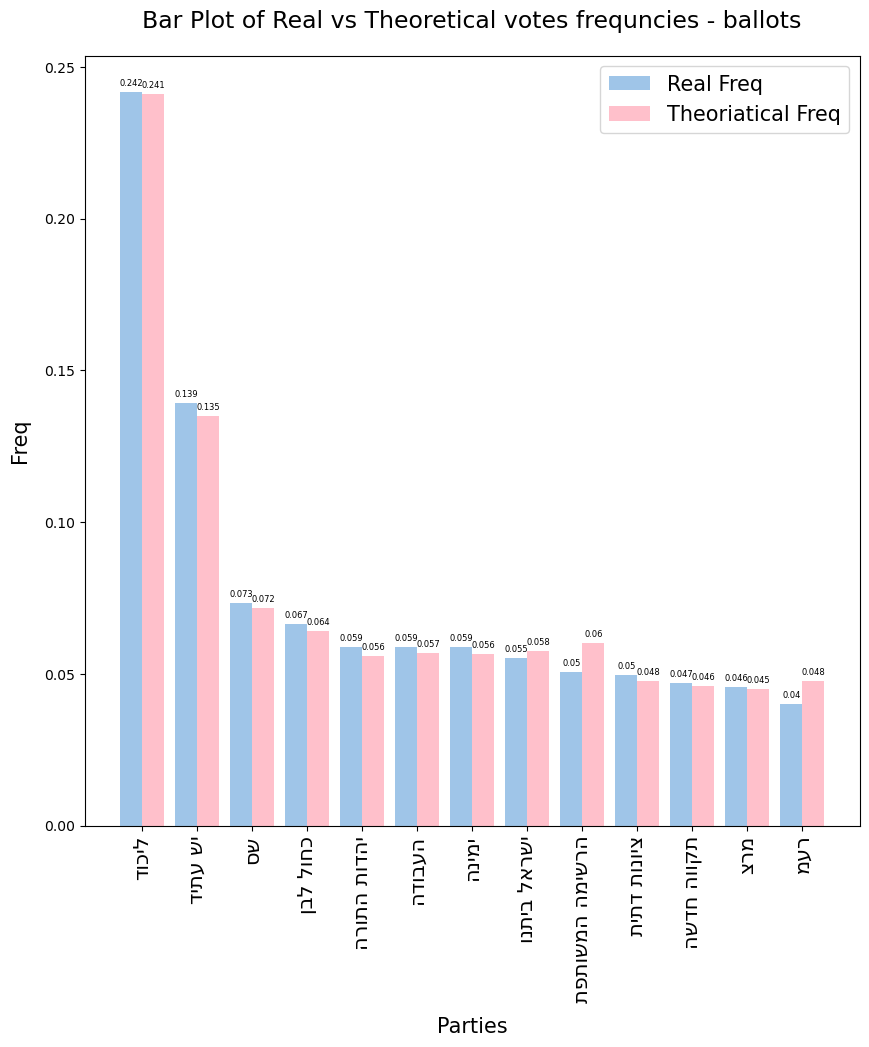

In [341]:
df1 = df1.loc[df1['שם ישוב'] != 'מעטפות חיצוניות']
df4 = df1.copy()

df1.loc["total"] = df1.sum()

for party in parties_freq.keys():
  df4[party] = [round(item) for item in np.array(df4[party])/np.array(df4['כשרים']) * np.array(df4['בזב'])]

df4.loc["total"] = df4.sum()

parties_freq3 = {key: [] for key in parties_freq.keys()}
parties_freq4 = {key: [] for key in parties_freq.keys()}


for party in parties_freq.keys():
  parties_freq3[party] = df1[party].iloc[-1] / df1['כשרים'].iloc[-1]

for party in parties_freq.keys():
  parties_freq4[party] = df4[party].iloc[-1] / df4['בזב'].iloc[-1]

width = 0.4
X = np.arange(len(parties_freq1))
ax = plt.subplot(111)
first = ax.bar(X - width/2, parties_freq3.values(), width, color='#9fc5e8', align='center')
second = ax.bar(X + width/2, parties_freq4.values(), width, color='pink', align='center')
ax.legend(('Real Freq','Theoriatical Freq'), fontsize = 15)
plt.xticks(X, parties, fontsize = 15, rotation = 90)
plt.xlabel('Parties', labelpad = 10, fontsize = 15)
plt.ylabel('Freq', labelpad = 10, fontsize = 15)
plt.title("Bar Plot of Real vs Theoretical votes frequncies - ballots", fontsize=17)
plt.rcParams["figure.figsize"] = [10, 10]    
temp3 = [round(item, 3) for item in parties_freq3.values()]
temp4 = [round(item, 3) for item in parties_freq4.values()]
ax.bar_label(first,labels = temp3 ,padding=3, fontsize=6)
ax.bar_label(second,labels = temp4 ,padding=3, fontsize=6)
plt.show()

In [342]:
freq2, freq4 = list(parties_freq2.values()), list(parties_freq4.values())

result_dict = {'theoretical votes in ballots': freq4, 'theoretical votes in cities':freq2, 'difference':np.subtract(freq4, freq2)}

compare = pd.DataFrame(result_dict, index = list(parties_freq.keys())).rename_axis('Parties', axis =1)
compare.loc['total'] = compare.sum()

compare

Parties,theoretical votes in ballots,theoretical votes in cities,difference
מחל,0.241114,0.239215,0.001898
פה,0.135047,0.132815,0.002232
שס,0.071727,0.070688,0.001039
כן,0.064194,0.062930,0.001265
ג,0.055807,0.054354,0.001453
אמת,0.056993,0.055348,0.001645
ב,0.056458,0.055206,0.001252
ל,0.057500,0.057048,0.000452
ודעם,0.060146,0.067546,-0.007400
ט,0.047791,0.046348,0.001443


Looking at both bar plots and the table above, we can the results look almost the same, with great similiarities and small differeces. From both bar plots, we can see that Arab parties would benefit the most if everyone voted.